In [49]:
import pandas as pd

In [50]:
import numpy as np

In [51]:
cols = ['ID', 'TITLE', 'GENRE', 'DESCRIPTION']
train = pd.read_csv('train_data.txt', sep=' ::: ', names=cols, engine='python')
print(train.head())

   ID                             TITLE     GENRE  \
0   1      Oscar et la dame rose (2009)     drama   
1   2                      Cupid (1997)  thriller   
2   3  Young, Wild and Wonderful (1980)     adult   
3   4             The Secret Sin (1915)     drama   
4   5            The Unrecovered (2007)     drama   

                                         DESCRIPTION  
0  Listening in to a conversation between his doc...  
1  A brother and sister with a past incestuous re...  
2  As the bus empties the students for their fiel...  
3  To help their unemployed father make ends meet...  
4  The film's title refers not only to the un-rec...  


In [52]:
train.shape

(54214, 4)

In [53]:
train.shape[0]

54214

In [54]:
print(train.isnull().sum())

ID             0
TITLE          0
GENRE          0
DESCRIPTION    0
dtype: int64


In [55]:
print(train.isnull().sum().sum())

0


In [56]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           54214 non-null  int64 
 1   TITLE        54214 non-null  object
 2   GENRE        54214 non-null  object
 3   DESCRIPTION  54214 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


In [57]:
import re

In [58]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [59]:
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to C:\Users\Devendra
[nltk_data]     kushwah\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Devendra
[nltk_data]     kushwah\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [60]:

def advanced_clean(text):
    text = re.sub(r'[^a-zA-Z ]', ' ', text)  # Remove non-letter chars
    text = text.lower()
    words = text.split()
    words = [lemmatizer.lemmatize(w) for w in words if w not in stop_words and len(w) > 2]
    return ' '.join(words)

In [61]:
print("\nCleaning text (this may take a few minutes)...")
train['DESCRIPTION'] = train['DESCRIPTION'].apply(advanced_clean)
train['TITLE'] = train['TITLE'].apply(advanced_clean)


Cleaning text (this may take a few minutes)...


In [62]:
train['TEXT'] = train['TITLE'] + " " + train['DESCRIPTION']

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X = train['TEXT']
y = train['GENRE']

In [65]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"\nTraining Samples: {len(X_train)}, Validation Samples: {len(X_val)}")


Training Samples: 43371, Validation Samples: 10843


In [66]:

print("\nTraining Samples:", len(X_train))
print("Validation Samples:", len(X_val))


Training Samples: 43371
Validation Samples: 10843


In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [68]:
tfidf = TfidfVectorizer(
    max_features=15000,
    ngram_range=(1, 2),
    stop_words='english',
    sublinear_tf=True
)

In [69]:
X_train_tfidf = tfidf.fit_transform(X_train)
X_val_tfidf = tfidf.transform(X_val)

In [70]:
from sklearn.svm import LinearSVC

In [72]:
print("\nTraining LinearSVC model...")
model = LinearSVC()
model.fit(X_train_tfidf, y_train)


Training LinearSVC model...


LinearSVC()

In [73]:
y_pred = model.predict(X_val_tfidf)

In [74]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [75]:
acc = accuracy_score(y_val, y_pred)

print("\nModel Evaluation Results:")
print("Accuracy:", round(acc * 100, 2), "%")
print("\nClassification Report:\n", classification_report(y_val, y_pred))


Model Evaluation Results:
Accuracy: 57.55 %

Classification Report:
               precision    recall  f1-score   support

      action       0.42      0.32      0.36       263
       adult       0.66      0.46      0.54       112
   adventure       0.43      0.27      0.33       139
   animation       0.36      0.15      0.21       104
   biography       0.00      0.00      0.00        61
      comedy       0.52      0.59      0.55      1443
       crime       0.22      0.08      0.12       107
 documentary       0.70      0.79      0.74      2659
       drama       0.56      0.69      0.62      2697
      family       0.32      0.17      0.22       150
     fantasy       0.31      0.05      0.09        74
   game-show       0.84      0.65      0.73        40
     history       0.17      0.02      0.04        45
      horror       0.64      0.68      0.66       431
       music       0.56      0.58      0.57       144
     musical       0.50      0.10      0.17        50
     myster

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

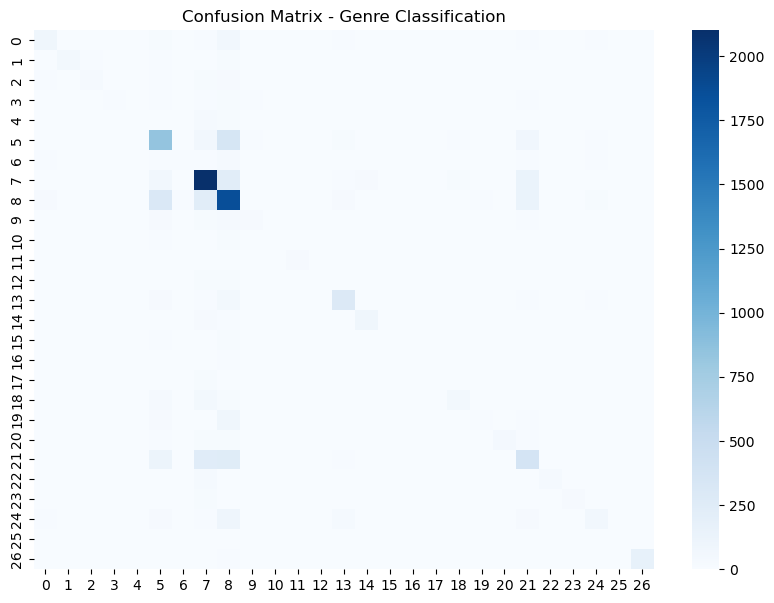

In [77]:
plt.figure(figsize=(10, 7))
cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=False, cmap='Blues')
plt.title("Confusion Matrix - Genre Classification")
plt.show()


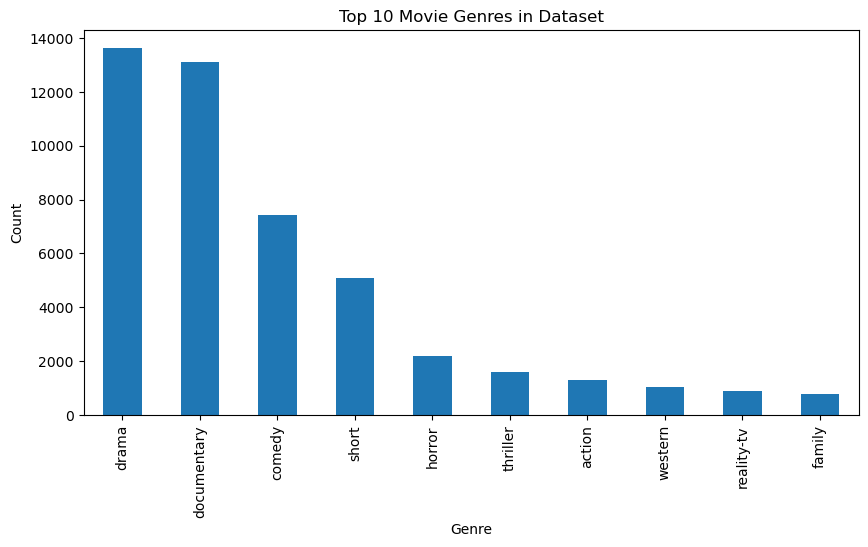

In [78]:
plt.figure(figsize=(10, 5))
train['GENRE'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Movie Genres in Dataset")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.show()

In [79]:
import joblib
joblib.dump(model, 'genre_classifier.pkl')
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')
print("\nModel and Vectorizer saved as 'genre_classifier.pkl' and 'tfidf_vectorizer.pkl'")



Model and Vectorizer saved as 'genre_classifier.pkl' and 'tfidf_vectorizer.pkl'


In [80]:
def predict_genre(title, description):
    text = advanced_clean(title + " " + description)
    text_vec = tfidf.transform([text])
    prediction = model.predict(text_vec)[0]
    return prediction

print("\nExample Prediction:")
print(predict_genre("Avengers Infinity War", "A group of superheroes fights a powerful villain to save the universe."))

print("\nAll steps completed successfully!")


Example Prediction:
action

All steps completed successfully!
